In [12]:
import numpy as np
import pandas as pd

## 1. Data Cleaning


In [13]:
df = pd.read_csv("data/spam.csv", encoding="latin-1")

In [14]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


The reason for dropping these columns is that they are unnamed and likely not useful for analysis or modeling purposes. By dropping them, we can simplify the DataFrame and reduce the memory usage. Given the amount of non-null values had been significant in our dataframe, I may have thought of keeping them or doing some research about it. Although, given the number of values that we currently have, I can confidently drop them since they may add little to no value in our analysis.


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [17]:
df.shape


(5572, 2)

In [18]:
df.sample(5)


,Category,Message
5384,ham,How are you babes. Hope your doing ok. I had a...
2956,ham,Id have to check but there's only like 1 bowls...
2564,ham,K..k..i'm also fine:)when will you complete th...
2502,ham,No da..today also i forgot..
2821,spam,INTERFLORA - ÂIt's not too late to order Inte...


In [19]:
# Rename the 'v1' column to 'target' and 'v2' column to 'text'
df.rename(columns={'Category': 'target', 'Message': 'text'}, inplace=True)

# Print a random sample of 5 rows to confirm the column renaming
df.sample(5)


,target,text
4921,ham,"G says you never answer your texts, confirm/deny"
4964,ham,I want to see your pretty pussy...
2812,ham,Thinkin about someone is all good. No drugs fo...
495,ham,Are you free now?can i call now?
3040,ham,"Wishing you and your family Merry ""X"" mas and ..."


In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [21]:
df['target'] = encoder.fit_transform(df['target'])

In [22]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
# Count the number of missing values in each column
missing_values = df.isnull().sum()

# Print the results
print("Number of missing values:\n", missing_values)

Number of missing values:
 target    0
text      0
dtype: int64


In [24]:
# Count the number of duplicate rows
num_duplicates = df.duplicated().sum()

# Print the result
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 415


In [25]:
# Remove duplicate rows, keeping the first occurrence
df = df.drop_duplicates(keep='first')

# Print the shape of the DataFrame to confirm the removal of duplicate rows
print("Shape of the DataFrame after removing duplicates:", df.shape)

Shape of the DataFrame after removing duplicates: (5157, 2)


In [26]:
# Count the number of duplicate rows
num_duplicates = df.duplicated().sum()

# Print the result
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


## 2. EDA


In [27]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
df['target'].value_counts()

0    4516
1     641
Name: target, dtype: int64

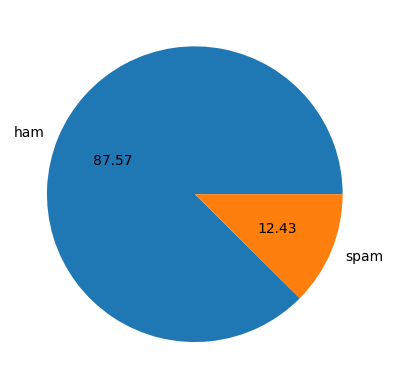

In [29]:
import matplotlib.pyplot as plt

# Create a pie chart of the target column
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")

# Show the pie chart
plt.show()

In [30]:
import nltk

In [31]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kaiqu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
# Define a lambda function to count the number of characters in a text
def count_characters(x): return len(x)


# Apply the lambda function to the text column and store the result in a new column called num_characters
df['num_characters'] = df['text'].apply(count_characters)

In [33]:
# Define a lambda function to count the number of words in a text
def count_words(x): return len(nltk.word_tokenize(x))

# Apply the lambda function to the text column and store the result in a new column called num_words
df['num_words'] = df['text'].apply(count_words)

In [34]:
# Define a lambda function to count the number of sentences in a text
def count_sentences(x): return len(nltk.sent_tokenize(x))

# Apply the lambda function to the text column and store the result in a new column called num_sentences
df['num_sentences'] = df['text'].apply(count_sentences)

In [35]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.228040,18.544890,1.969750
std,58.451149,13.401415,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


The `compute_stats` function takes in two arguments: a Pandas DataFrame `df` and a target value `target_value`. The function is designed to compute the descriptive statistics for the columns 'num_characters', 'num_words', and 'num_sentences' using the `.describe()` method on the rows in the `df` DataFrame where the target column matches the specified `target_value`.

The function returns the resulting statistics as a Pandas DataFrame `stats_df`. The function's docstring provides information on the function's parameters, what it does, and what it returns.


In [37]:
def compute_stats(df, target_value):
    """
    Computes descriptive statistics for the columns 'num_characters', 'num_words', and 'num_sentences'
    for the specified target value in the given DataFrame.

    Parameters:
    -----------
    df: Pandas DataFrame
        The DataFrame containing the data to analyze.
    target_value: str
        The target value to analyze (e.g., 'ham' or 'spam').

    Returns:
    --------
    stats_df: Pandas DataFrame
        A DataFrame containing the descriptive statistics for the specified target value.
    """
    stats_df = df.loc[df['target'] == target_value, [
        'num_characters', 'num_words', 'num_sentences']].describe()
    return stats_df

In [38]:
ham_stats = compute_stats(df, 0)
ham_stats

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.951063,17.250664,1.827724
std,56.730031,13.581714,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
spam_stats = compute_stats(df, 1)
spam_stats

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.541342,27.663027,2.970359
std,30.516111,7.104050,1.485575
min,7.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [40]:
import seaborn as sns

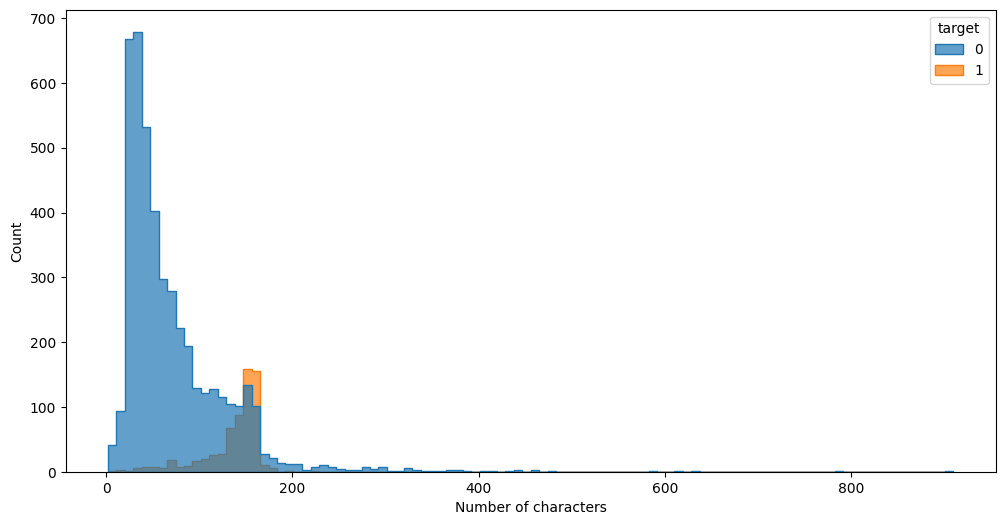

In [41]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='num_characters', hue='target',
             element='step', alpha=0.7, bins=100)

# Add x and y labels to the plot
plt.xlabel('Number of characters')
plt.ylabel('Count')
plt.show()

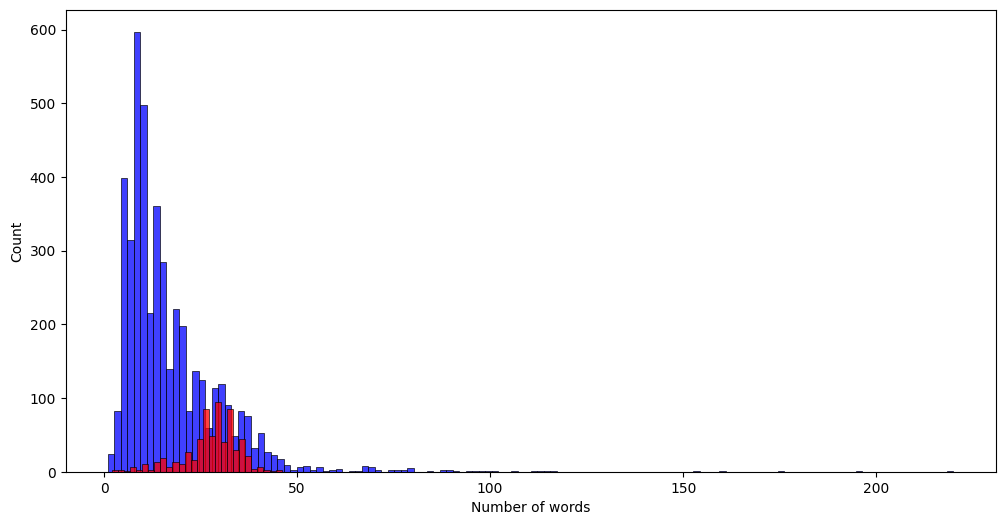

In [42]:
plt.figure(figsize=(12, 6))
for target_value, color in zip([0, 1], ['blue', 'red']):
    sns.histplot(df[df['target'] == target_value]['num_words'], color=color)
    # Add x and y labels to the plot
    plt.xlabel('Number of words')
    plt.ylabel('Count')

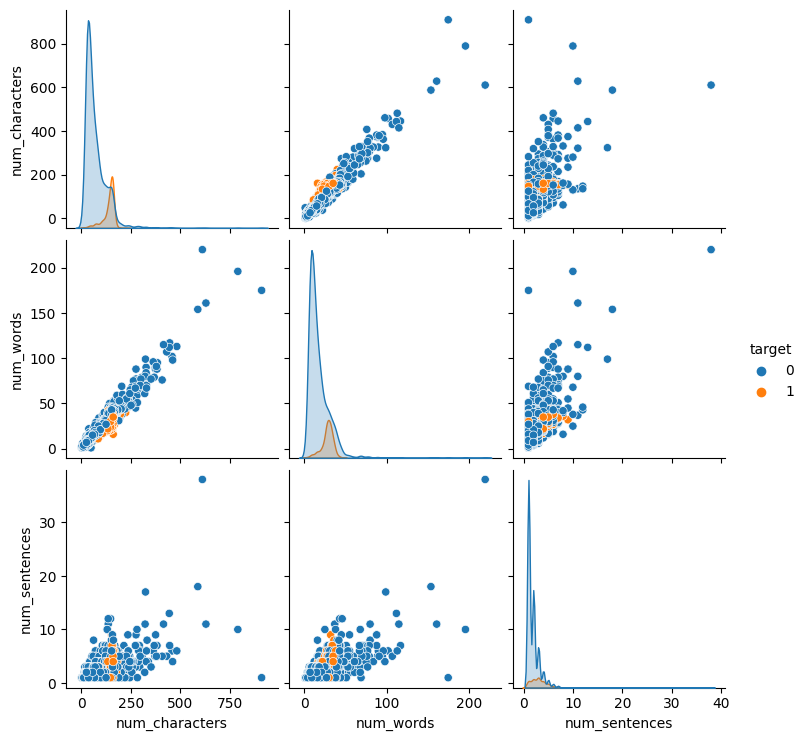

In [43]:
sns.pairplot(df, hue='target')

<AxesSubplot:>

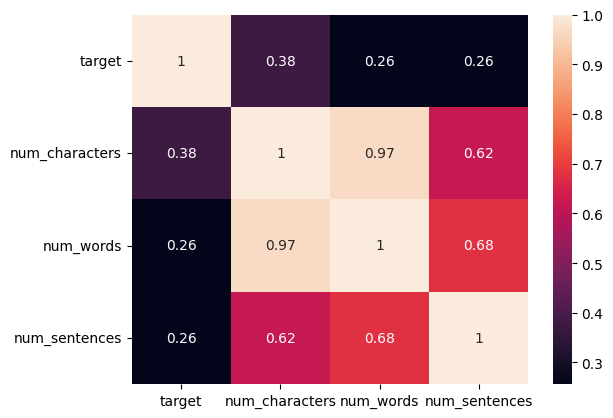

In [44]:
sns.heatmap(df.corr(), annot=True)

## 3. Data Preprocessing


In [45]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kaiqu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
def transform_text(text):

    from nltk.stem.porter import PorterStemmer
    import string

    # Convert text to lowercase and tokenize into words
    words = nltk.word_tokenize(text.lower())

    # Remove non-alphanumeric characters
    words = [w for w in words if w.isalnum()]

    # Remove stopwords and punctuation
    stopwords_set = set(nltk.corpus.stopwords.words('english'))
    words = [
        w for w in words if w not in stopwords_set and w not in string.punctuation]

    # Stem words using PorterStemmer
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]

    # Join the preprocessed words into a single string
    return " ".join(words)


In [47]:
transform_text(
    "I'm a data science student at University at Buffalo.")

'data scienc student univers buffalo'

In [48]:
df['transformed_text'] = df['text'].apply(transform_text)

In [49]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [50]:
def generate_wordcloud_and_barplot(data, target):
    """
    Generates a word cloud and bar plot of the most common words in a given target category of a DataFrame.

    Args:
    data (DataFrame): The DataFrame containing the text data.
    target (int): The target category for which to generate the word cloud and bar plot.

    Returns:
    None
    """
    from collections import Counter
    import matplotlib.pyplot as plt
    import seaborn as sns
    from wordcloud import WordCloud

    print(f"WordCloud for target = {target} \n")

    # Generate word cloud
    wc = WordCloud(width=500, height=500, min_font_size=10,
                   background_color='white')
    corpus = [word for msg in data[data['target'] == target]
              ['transformed_text'].tolist() for word in msg.split()]
    wc.generate(" ".join(corpus))
    plt.figure(figsize=(15, 6))
    plt.imshow(wc)
    plt.show()

    print(f"Bar Plot for target = {target} \n")

    # Generate bar plot of most common words
    target_corpus = [word for msg in df[df['target'] == target]
                     ['transformed_text'].tolist() for word in msg.split()]
    top_words = Counter(target_corpus).most_common(30)
    sns.barplot(x=[word[0] for word in top_words], y=[word[1]
                for word in top_words])
    plt.xticks(rotation='vertical')
    plt.show()


WordCloud for target = 1 



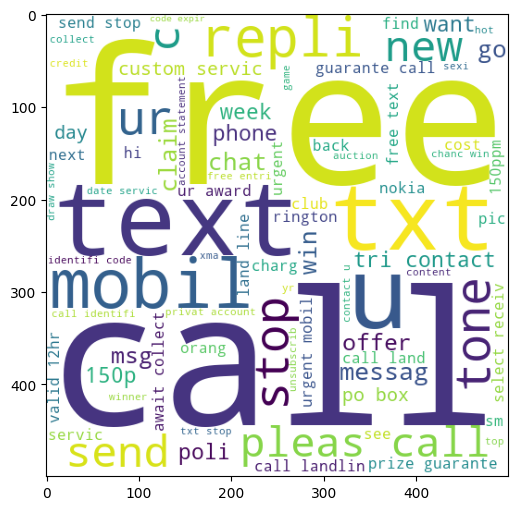

Bar Plot for target = 1 



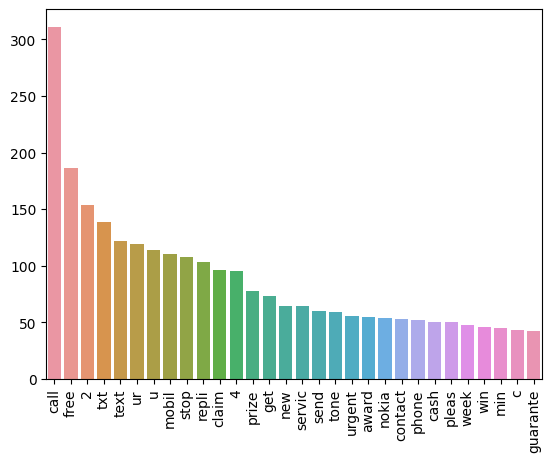

In [51]:
# Generate spam word cloud and bar plot
generate_wordcloud_and_barplot(df, 1)


WordCloud for target = 0 



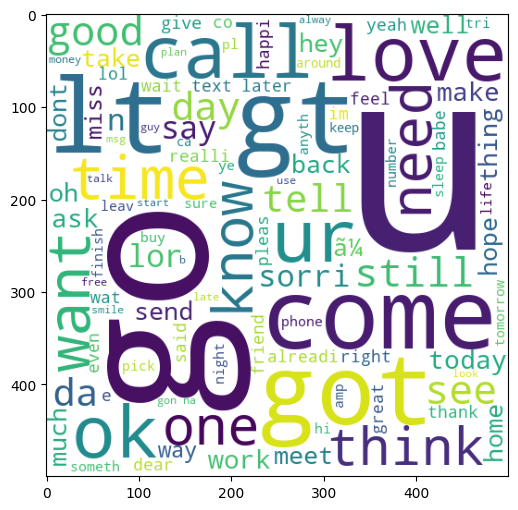

Bar Plot for target = 0 



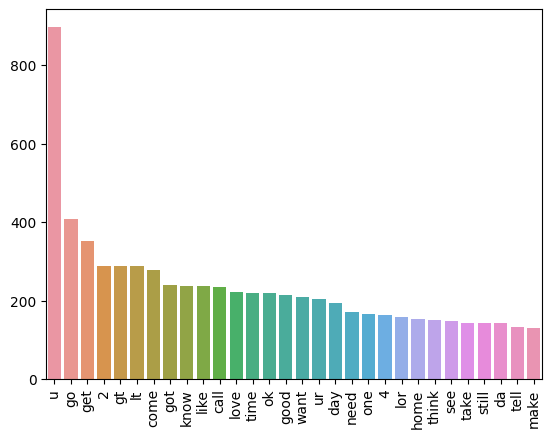

In [52]:
# Generate ham word cloud and bar plot
generate_wordcloud_and_barplot(df, 0)

In [53]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building


Since the data is imbalanced, we'll pay more heed to the precision score than to the accuracy.


In [54]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [55]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [56]:
X.shape

(5157, 3000)

In [57]:
y = df['target'].values

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2)

In [59]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [60]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [61]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8682170542635659
[[787 118]
 [ 18 109]]
0.4801762114537445


In [62]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9728682170542635
[[905   0]
 [ 28  99]]
1.0


In [63]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835271317829457
[[903   2]
 [ 15 112]]
0.9824561403508771


In [64]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\kaiqu\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [66]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)


In [67]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}


In [68]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [69]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9777131782945736, 0.9905660377358491)

In [70]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():

    current_accuracy, current_precision = train_classifier(
        clf, X_train, y_train, X_test, y_test)

    print("--------------------------------------------------------")
    print(f"For {name}")
    print(f"Accuracy --> {current_accuracy}",)
    print(f"Precision --> {current_precision}")
    print("--------------------------------------------------------")

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


--------------------------------------------------------
For SVC
Accuracy --> 0.9777131782945736
Precision --> 0.9905660377358491
--------------------------------------------------------
--------------------------------------------------------
For KN
Accuracy --> 0.9127906976744186
Precision --> 1.0
--------------------------------------------------------
--------------------------------------------------------
For NB
Accuracy --> 0.9728682170542635
Precision --> 1.0
--------------------------------------------------------
--------------------------------------------------------
For DT
Accuracy --> 0.936046511627907
Precision --> 0.8210526315789474
--------------------------------------------------------
--------------------------------------------------------
For LR
Accuracy --> 0.9583333333333334
Precision --> 0.9375
--------------------------------------------------------
--------------------------------------------------------
For RF
Accuracy --> 0.9709302325581395
Precision --> 1.

In [71]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores,
                              'Precision': precision_scores}).sort_values('Precision', ascending=False)

In [72]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.912791,1.000000
2,NB,0.972868,1.000000
5,RF,0.970930,1.000000
0,SVC,0.977713,0.990566
8,ETC,0.977713,0.990566
9,GBDT,0.949612,0.974684
10,xgb,0.971899,0.971154
6,AdaBoost,0.967054,0.951456
4,LR,0.958333,0.937500
7,BgC,0.961240,0.891892


In [73]:
performance_df1 = pd.melt(performance_df, id_vars="Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.912791
1,NB,Accuracy,0.972868
2,RF,Accuracy,0.970930
3,SVC,Accuracy,0.977713
4,ETC,Accuracy,0.977713
5,GBDT,Accuracy,0.949612
6,xgb,Accuracy,0.971899
7,AdaBoost,Accuracy,0.967054
8,LR,Accuracy,0.958333
9,BgC,Accuracy,0.961240


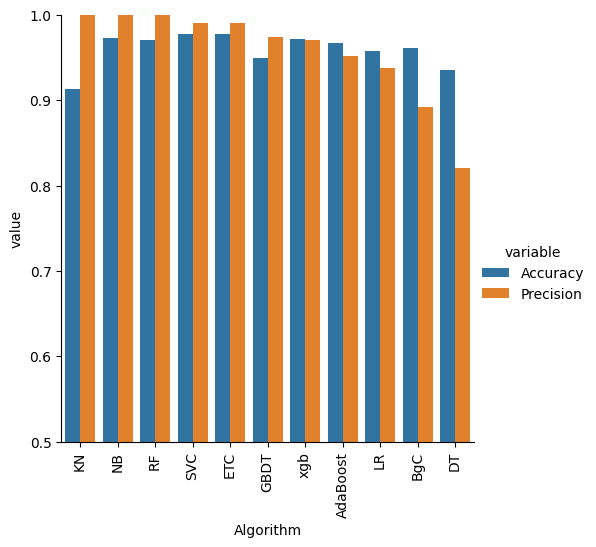

In [74]:
sns.catplot(x='Algorithm', y='value',
            hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

In [75]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.912791,1.000000,0.912791,1.000000,0.912791,1.000000,0.912791,1.000000
1,NB,0.972868,1.000000,0.972868,1.000000,0.972868,1.000000,0.972868,1.000000
2,RF,0.970930,1.000000,0.970930,1.000000,0.970930,1.000000,0.970930,1.000000
3,SVC,0.977713,0.990566,0.977713,0.990566,0.977713,0.990566,0.977713,0.990566
4,ETC,0.977713,0.990566,0.977713,0.990566,0.977713,0.990566,0.977713,0.990566
5,GBDT,0.949612,0.974684,0.949612,0.974684,0.949612,0.974684,0.949612,0.974684
6,xgb,0.971899,0.971154,0.971899,0.971154,0.971899,0.971154,0.971899,0.971154
7,AdaBoost,0.967054,0.951456,0.967054,0.951456,0.967054,0.951456,0.967054,0.951456
8,LR,0.958333,0.937500,0.958333,0.937500,0.958333,0.937500,0.958333,0.937500
9,BgC,0.961240,0.891892,0.961240,0.891892,0.961240,0.891892,0.961240,0.891892


In [91]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

voting = VotingClassifier(
    estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [92]:
y_pred = voting.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9825581395348837
Precision 1.0


In [93]:
# Applying stacking
from sklearn.ensemble import StackingClassifier
estimators = [('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator = RandomForestClassifier()
clf = StackingClassifier(estimators=estimators,
                         final_estimator=final_estimator)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9815891472868217
Precision 0.9736842105263158


tfidf --> MNB seems to be the winner


In [96]:
mnb.fit(X_train, y_train)

MultinomialNB()

In [112]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))